In [1]:
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cdms2


CDMS regrider: regrid var1 (higher resolution) toward var2 (lower resolution)
Bilinear method works, but Conservative method created erroneous boundary around masked data.

In [2]:
file_name1 = '/Users/zhang40/Downloads/HadISST_CL-SST-ANN-global_test.nc'

In [3]:
fin = cdms2.open(file_name1)
var1 = fin('SST',squeeze=1)
print(var1.shape)

(720, 1440)


In [4]:
file_name2 = '/Users/zhang40/Downloads/HadISST_CL-SST-ANN-global_ref.nc'
fin2 = cdms2.open(file_name2)
var2 = fin2('SST',squeeze=1)
print(var2.shape)

(180, 360)


In [5]:
var1_reg = var1.regrid(
            var2.getGrid(),
            regridTool='esmf',
            #regridMethod='bilinear',
            regridMethod='conservative',
        )

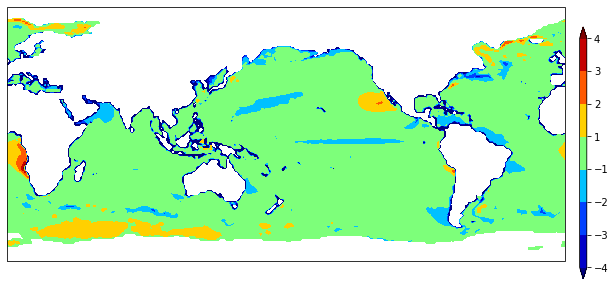

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,5),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
#ax.coastlines()
p1 = ax.contourf(
    var1_reg.getLongitude(),
    var1_reg.getLatitude(),
    var1_reg-var2,
    transform=ccrs.PlateCarree(),
    extend="both",
    cmap = 'jet',
    levels = [-4.0, -3, -2, -1, 1, 2, 3, 4]
)
 
cbax = fig.add_axes([0.92, 0.1, 0.01, 0.7])
cbar = fig.colorbar(p1, cax=cbax)
plt.show()

XARRAY regridding: regrid var1 (higher resolution) toward var2 (lower resolution)
Bilinear method works, but Conservative method fails with errors

In [7]:
import xarray as xr
import xesmf as xe
import netCDF4

In [8]:
v1 = xr.open_dataset(file_name1).SST

In [9]:
v2 = xr.open_dataset(file_name2).SST

In [ ]:
regridder = xe.Regridder(v1, v2, 'bilinear')
#regridder = xe.Regridder(v1, v2, 'conservative_normed') #`conservative` method fails with errors:AttributeError: 'get_bounds' is not a valid attribute on the underlying xarray object.

In [ ]:
regridder

In [ ]:
v1_reg = regridder(v1)

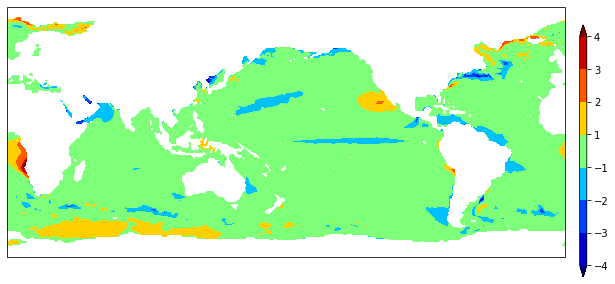

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,5),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
#ax.coastlines()
p1 = ax.contourf(
    v1_reg['longitude'],
    v1_reg['latitude'],
    v1_reg-var2,
    transform=ccrs.PlateCarree(),
    extend="both",
    cmap = 'jet',
    levels = [-4.0, -3, -2, -1, 1, 2, 3, 4]
)
 
cbax = fig.add_axes([0.92, 0.1, 0.01, 0.7])
cbar = fig.colorbar(p1, cax=cbax)
plt.show()